In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo


In [14]:
# Fetch dataset from UCI Repo
heart_disease = fetch_ucirepo(id=45)

# Features (X) and Target (y)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

# Preview
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [15]:
# Shape of dataset
print("Shape:", df.shape)

# Info
print(df.info())

# Missing values
print(df.isnull().sum())

# Drop missing values (if any)
df = df.dropna()


Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
d

In [16]:
# Descriptive statistics
print(df.describe())
# Example grouping: Mean age by sex
print(df.groupby("sex")["age"].mean())
# Example grouping: Average cholesterol by heart disease status
print(df.groupby("num")["chol"].mean())


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

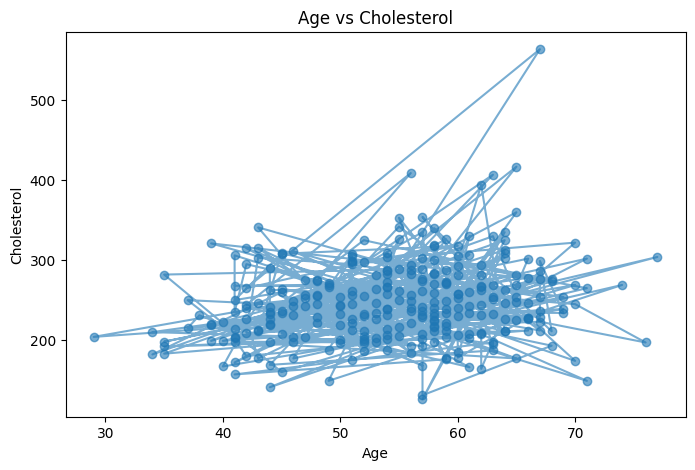

In [17]:
plt.figure(figsize=(8,5))
plt.plot(df["age"], df["chol"], 'o-', alpha=0.6)
plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


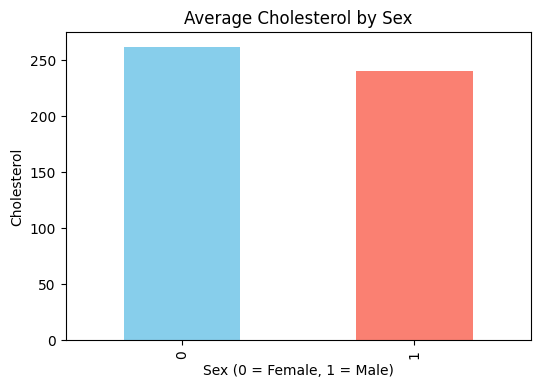

In [18]:
plt.figure(figsize=(6,4))
df.groupby("sex")["chol"].mean().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Average Cholesterol by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Cholesterol")
plt.show()


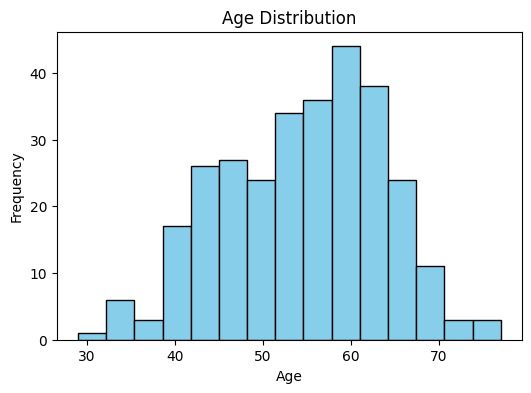

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df["age"], bins=15, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


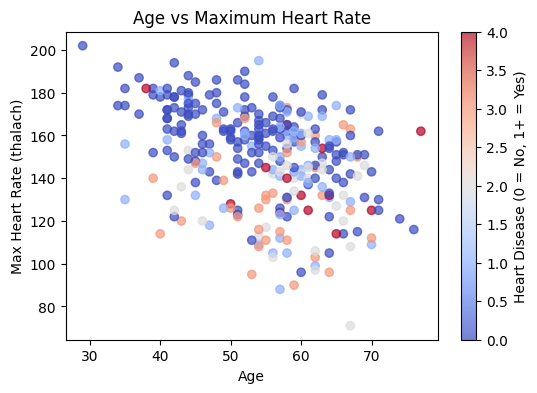

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(df["age"], df["thalach"], alpha=0.7, c=df["num"], cmap="coolwarm")
plt.title("Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.colorbar(label="Heart Disease (0 = No, 1+ = Yes)")
plt.show()


In [21]:
#Merge data sets, add a patient_id column to X
X = X.reset_index().rename(columns={'index': 'patient_id'})

# Create a dummy dataframe with patient_id and city
patient_info = pd.DataFrame({
    'patient_id': X['patient_id'],
    'city': ['Nairobi', 'Mombasa', 'Kisumu', 'Nakuru'] * (len(X) // 4) + ['Nairobi'] * (len(X) % 4)
})

# Merge X with patient_info
merged_df = pd.merge(X, patient_info, on='patient_id')
merged_df.head()


,patient_id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,city
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Nairobi
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Mombasa
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Kisumu
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Nakuru
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Nairobi
